# **1 - Importando os dados de treino e teste**

In [ ]:
import pandas as pd
import numpy as np

# Import
df_treino = pd.read_csv('/content/drive/MyDrive/air_system_previous_years.csv')
df_teste = pd.read_csv('/content/drive/MyDrive/air_system_present_year.csv')

# Alterando a configuração do pandas para "printar" todas as colunas
# pd.set_option('display.max_columns', None)
# Alterando a configuração do pandas para "printar" todas as linhas
# pd.set_option('display.max_rows', None)

# Lendos as 10 primeiras linhas
df_treino.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


## **1.1 - Ajuste nas features**

#### **1.1.1 - Ajusta a variável target**

A variável resposta (**class**) indica os caminhões que apresentaram defeitos no sistema de ar. Caminhões defeituosos (**"pos"**) serão representados pelo número 1. Caminhões não defeituosos (**"neg"**) serão representados pelo número 0.

In [ ]:
df_treino['class'] = df_treino['class'].apply(lambda x : 1 if x == 'pos' else 0)
df_teste['class'] = df_teste['class'].apply(lambda x : 1 if x == 'pos' else 0)

df_treino.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


#### **1.1.2 - Ajusta os valores faltantes das features**

Foi informado que os valores preenchidos com 'na' são valores faltantes.
Inicialmente serão preenchidos como NaN (Not a Number), e posteriormente preenchidos com o que estiver alinhado com a necessidade de negócio.

In [ ]:
df_treino = df_treino.apply(pd.to_numeric, errors='coerce')
df_teste = df_teste.apply(pd.to_numeric, errors='coerce')

df_treino.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# **2 - Análise Exploratória de Dados (inicial)**

A primeira AED será de forma superficial, para identificar a quantidade de variáveis e valores faltantes.

Após o feature selection, será realizada uma nova análise exploratória dos dados para identificar as discriminação entre as variáveis escolhidas.

## **2.1 - Identifica o tamanho da tabela**

In [ ]:
rows_columns = df_treino.shape

rows = rows_columns[0]
columns = rows_columns[1]

print(f"Existem {rows:,} linhas no dataframe.")
print(f"Existem {columns:,} colunas no dataframe.")

Existem 60,000 linhas no dataframe.
Existem 171 colunas no dataframe.


## **2.2 - Identifica a distribuição da variável resposta**

In [ ]:
pd.concat([df_treino['class'].value_counts(), df_treino['class'].value_counts(normalize=True)],axis=1, keys=('counts','percentage'))

,counts,percentage
0,59000,0.983333
1,1000,0.016667


A variável resposta está desbalanceada.

## **2.3 - Identifica o tipo das features e quantidade de valores faltantes**

Identifica a quantidade de valores missing por variável.

In [ ]:
df_tipo_qtd_missing = (
    pd.DataFrame(df_treino.dtypes, columns=['Tipo'])
    .assign(qtd_valores = df_treino.count())
    .assign(qtd_missing = df_treino.isnull().sum())
    .assign(percent_missing = lambda df: (df['qtd_missing'] / (df['qtd_valores'] + df['qtd_missing']) ))
).sort_values(by='percent_missing')

df_tipo_qtd_missing

,Tipo,qtd_valores,qtd_missing,percent_missing
class,int64,60000,0,0.000000
aa_000,int64,60000,0,0.000000
bt_000,float64,59833,167,0.002783
ck_000,float64,59662,338,0.005633
cj_000,float64,59662,338,0.005633
...,...,...,...,...
cr_000,float64,13671,46329,0.772150
bo_000,float64,13667,46333,0.772217
bp_000,float64,12260,47740,0.795667
bq_000,float64,11278,48722,0.812033


# **3 - Feature selection**

## **3.1 - Variável target e variáveis explicativas**

Definição das variáveis target e explicativas para ajuste do modelo.

In [ ]:
features = [col for col in df_treino.columns if col not in ['class']]
X_treino = df_treino.filter(features)
y_treino = df_treino['class']

## **3.2 - Remover as features com muitos valores missing**

O primeiro critério para selecionar as variáveis que melhor ajustam o modelo será excluir as variavéis com muitos valores faltantes.

O racional utilizado para esse case será: 
**remover variáveis outliers de dados faltantes.**

In [ ]:
df_tipo_qtd_missing.describe()

,qtd_valores,qtd_missing,percent_missing
count,171.000000,171.000000,171.000000
mean,55029.152047,4970.847953,0.082847
std,10212.750350,10212.750350,0.170213
min,10736.000000,0.000000,0.000000
25%,57273.000000,671.000000,0.011183
50%,59312.000000,688.000000,0.011467
75%,59329.000000,2727.000000,0.045450
max,60000.000000,49264.000000,0.821067


In [ ]:
IIQ = 2727 - 671
LI = 671 - (1.5*IIQ)
LS = 2727 + (1.5*IIQ)

print(f"Intervalo Interquartil:  {IIQ:,}.")
print(f"Limite Inferior: {LI:,}.")
print(f"Limite Superior: {LS:,}.")

print(f"Existem {len(df_tipo_qtd_missing[df_tipo_qtd_missing['qtd_missing'] < LI])} features com valores abaixo do LI.")
print(f"Existem {len(df_tipo_qtd_missing[df_tipo_qtd_missing['qtd_missing'] > LS])} features com valores acima do LS.")

Intervalo Interquartil:  2,056.
Limite Inferior: -2,413.0.
Limite Superior: 5,811.0.
Existem 0 features com valores abaixo do LI.
Existem 28 features com valores acima do LS.


Foram identificadas 28 variáveis com valores faltantes muito acima do restante e, portanto serão removidas.

In [ ]:
vars_outlier_missing = df_tipo_qtd_missing['qtd_missing'][df_tipo_qtd_missing['qtd_missing'] > LS].index.tolist()

print(f"Variáveis que erão excluídas: {vars_outlier_missing}")

Variáveis que erão excluídas: ['ed_000', 'cl_000', 'cm_000', 'ec_00', 'dc_000', 'db_000', 'da_000', 'cz_000', 'cy_000', 'cu_000', 'cv_000', 'ct_000', 'cx_000', 'ad_000', 'ch_000', 'cg_000', 'co_000', 'cf_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'ab_000', 'cr_000', 'bo_000', 'bp_000', 'bq_000', 'br_000']


In [ ]:
print(f"Quantidade de features iniciais: {X_treino.shape[1]}.")

X_treino = X_treino.drop(labels=vars_outlier_missing, axis=1)

print(f"Quantidade de features depois de remover missing: {X_treino.shape[1]}.")

Quantidade de features iniciais: 170.
Quantidade de features depois de remover missing: 142.


## **3.3 - Remover as features correlacionadas**

Identifica e remove as features que apresentam correlação a partir de 70%

In [ ]:
from feature_engine.selection import DropCorrelatedFeatures

correlacionadas = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.7)

correlacionadas.fit(X_treino)

print('Número de features antes de remover as correlacionadas: ', X_treino.shape[1])

X_treino = correlacionadas.transform(X_treino)

print('Número de features depois de remover as correlacionadas: ', X_treino.shape[1])

Número de features antes de remover as correlacionadas:  142
Número de features depois de remover as correlacionadas:  75


## **3.4 - Remover as features duplicadas**

Remove features com o mesmo valor.

In [ ]:
from feature_engine.selection import DropDuplicateFeatures

duplicates = DropDuplicateFeatures()

duplicates.fit(X_treino)

print('Número de features antes de remover as duplicadas: ', X_treino.shape[1])

X_treino = duplicates.transform(X_treino)

print('Número de features depois de remover as duplicadas: ', X_treino.shape[1])

Número de features antes de remover as duplicadas:  75
Número de features depois de remover as duplicadas:  75


## **3.5 - Remover as features por aleatoriedade (shuffling)**

Será construído um modelo com todas as features e então aleatorizar (shuffle) cada feature. A cada feature aleatorizada, será treinado um novo modelo e se houver uma grande perda de performance, significa que essa feature é muito importante para o modelo. Se a perda de performance for pequena, podemos remover a feature. Por padrão o threshold é setado para None, o que significa que o valor dele é a performance média de cada iteração.

Para realizar a seleção por shuffling, será utilizado Random Forest, portanto os valores missing terão que ser preenchidos.

Como ainda existem muitos valores missing, será utilizada a **mediana** para reduzir o impacto de outliers.

In [ ]:
from feature_engine.imputation import MeanMedianImputer

# Seleciona as colunas
num_vars = [col for col in X_treino.columns]

median_imputer = MeanMedianImputer(imputation_method='median', variables=num_vars)

median_imputer.fit(X_treino)

X_treino = median_imputer.transform(X_treino)

In [ ]:
from feature_engine.selection import SelectByShuffling
from sklearn.ensemble import RandomForestClassifier

shuffle = SelectByShuffling( 
    estimator = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42), 
    scoring="roc_auc", 
    cv=3,
    random_state=42
)

shuffle.fit(X_treino,y_treino)

print('Número de features antes de remover por shuffling: ', X_treino.shape[1])

X_treino = shuffle.transform(X_treino)

print('Número de features depois de remover por shuffling: ', X_treino.shape[1])

Número de features antes de remover por shuffling:  75
Número de features depois de remover por shuffling:  11


# **4 - Análise Exploratória de Dados nas variáveis que restaram**

In [ ]:
df_treino_final = pd.concat([X_treino,y_treino], axis=1, join="inner")
df_treino_final.head()

,aa_000,ai_000,ay_007,az_001,az_007,ba_008,cj_000,cs_001,cs_003,cs_004,de_000,class
0,76698,0.0,703300.0,2108.0,4.0,0.0,0.0,1226.0,521832.0,428776.0,1126.0,0
1,33058,0.0,1996924.0,7808.0,6.0,87082.0,0.0,796.0,350066.0,272956.0,522.0,0
2,41040,0.0,239798.0,1156.0,0.0,46.0,0.0,500.0,149726.0,100326.0,152.0,0
3,12,0.0,2038.0,6.0,1692.0,0.0,0.0,6.0,656.0,692.0,62.0,0
4,60874,0.0,819596.0,362.0,0.0,19292.0,0.0,520.0,227322.0,186242.0,444.0,0


In [ ]:
df_treino_final.describe()

,aa_000,ai_000,ay_007,az_001,az_007,ba_008,cj_000,cs_001,cs_003,cs_004,de_000,class
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,8.922438e+03,1.532641e+06,4.378664e+03,1.718348e+04,3.547163e+04,1.022625e+05,783.648600,3.527686e+05,4.402907e+05,364.653033,0.016667
std,1.454301e+05,1.624223e+05,5.079106e+06,3.380711e+04,2.788780e+05,2.422947e+05,1.131998e+06,2870.547192,1.105025e+06,2.062675e+06,1650.975778,0.128020
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000e+00,6.449500e+03,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,32.000000,3.204000e+03,2.824000e+03,68.000000,0.000000
50%,3.077600e+04,0.000000e+00,3.486220e+05,6.360000e+02,0.000000e+00,2.200000e+01,0.000000e+00,360.000000,1.217800e+05,9.108000e+04,144.000000,0.000000
75%,4.866800e+04,0.000000e+00,1.325426e+06,1.986000e+03,0.000000e+00,1.700000e+03,0.000000e+00,686.000000,2.926955e+05,2.062125e+05,284.000000,0.000000
max,2.746564e+06,1.651285e+07,4.896782e+08,4.530258e+06,3.915822e+07,3.126598e+07,6.094967e+07,438806.000000,4.242185e+07,7.486063e+07,176176.000000,1.000000


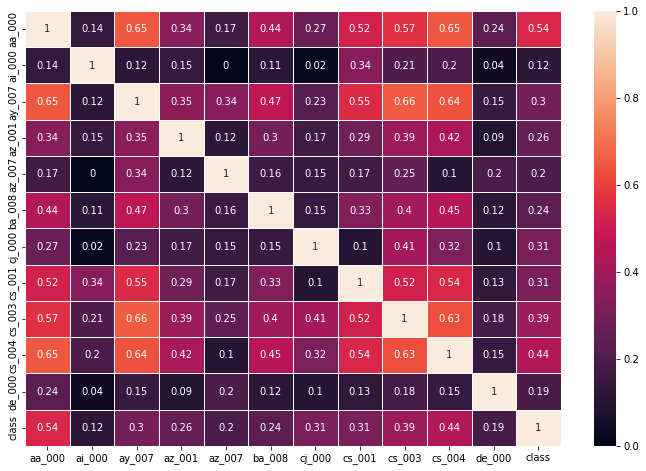

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 8))
sns.heatmap(df_treino_final.corr().round(2), annot=True, linewidths=.5);

É possível obervar pelo boxplot que existem muitos outliers. Esses valores serão normalizados para os modelos lineares.

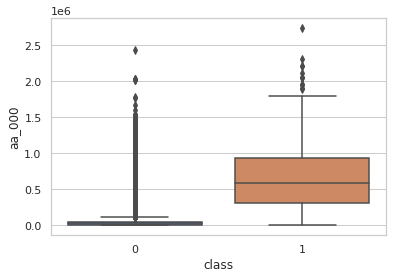

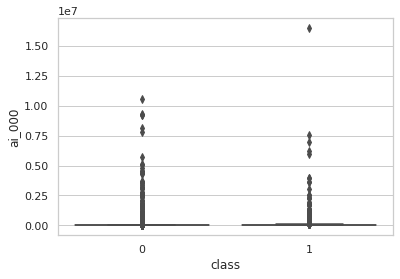

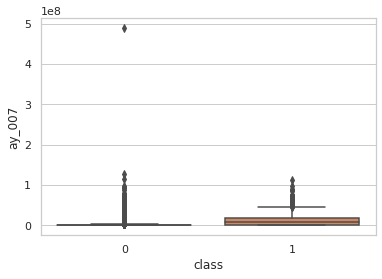

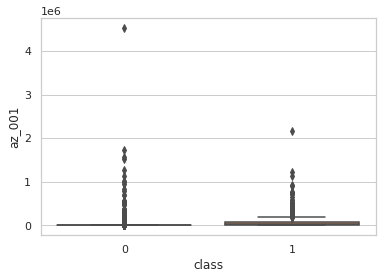

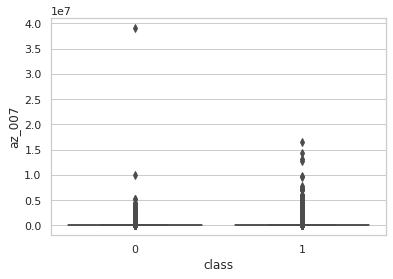

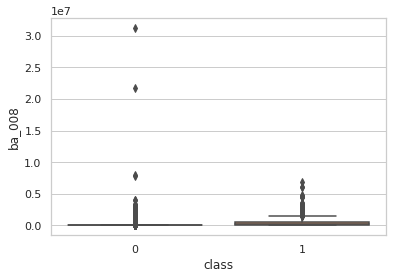

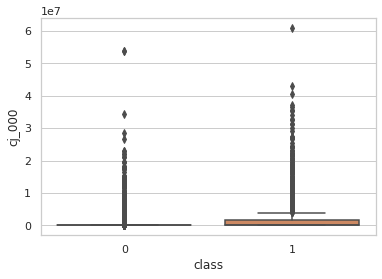

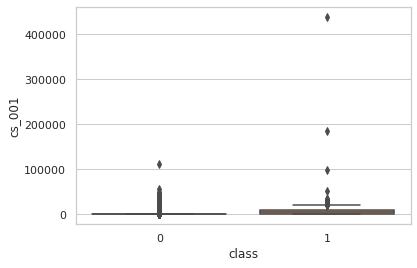

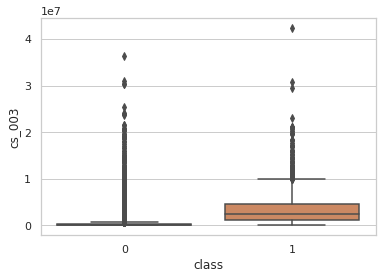

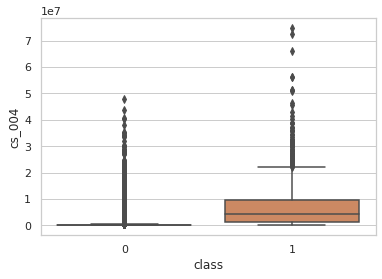

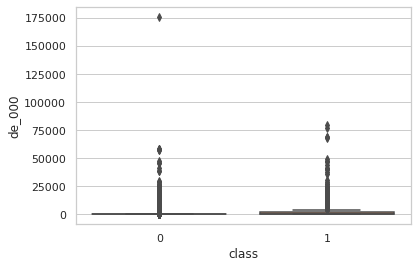

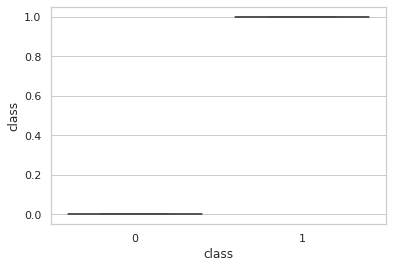

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

for x in df_treino_final[df_treino_final.columns[~df_treino_final.columns.isin(['TARGET'])]].describe().columns:
    plt.figure(x)
    sns.boxplot(x="class", y=f"{x}", data=df_treino_final)

# **5 - Data Modeling**

## **5.1 - Undersampling**

Conforme visto anteriormente, a variável target está desbalanceada. Será realizado o undersampling.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(sampling_strategy=0.05, random_state=42)
X_res, y_res = rus.fit_resample(X_treino, y_treino)

pd.concat([y_res.value_counts(), y_res.value_counts(normalize=True)],axis=1, keys=('counts','percentage'))

,counts,percentage
0,20000,0.952381
1,1000,0.047619


## **5.2 - Variáveis explicativas e target**

Neste passo é necessário separar as variáveis numéricas e categóricas para o featuring-engineering necessário, porém já se sabe que todas as variáveis são numéricas.

In [ ]:
num_vars = [col for col in X_treino.columns]

É necessário deixar a tabela de teste com as mesmas features da tabela de treino.

In [ ]:
features_teste = [col for col in X_treino.columns]
X_teste = df_teste.filter(features_teste)
y_teste = df_teste['class']

## **5.3 - Modelos**

Como não é necessário realizar feature scalling nos modelos baseados em árvore, serão criadas duas funções tendo como única diferença o feature scalling no pipeline.

Cada função terá:


1. Pipeline com feature engineering e modelo;
2. Cross validation por KFold estratificado;
3. Aplicação do modelo na base de teste.



In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Cria os dicionários que conterão as métricas de avaliação para treino e teste.

In [ ]:
# cria dicionário vazio que conterá o resultado dos modelos
df_metrics_treino = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'roc_auc': [], 'f1': []}
df_metrics_teste = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'roc_auc': [], 'f1': [], 'TN': [], 'FN': [], 'FP': [], 'TP': []}

#mostra resultados com apenas 2 casas decimais
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### **5.3.1 -Regressão linear e Support Vector Machine**

In [ ]:
def model(model_name, model_library):
    model = Pipeline(steps=[
        ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median'))
        ,('normalizacao', SklearnTransformerWrapper(transformer = StandardScaler(), variables = num_vars))
        ,('algorithm', model_library)
    ])

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_validate(estimator=model, X=X_res, y=y_res, scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'], cv=skf, n_jobs=-1)
    model_results = pd.DataFrame(cv_results)

    accuracy = model_results.mean().loc['test_accuracy']
    precision = model_results.mean().loc['test_precision']
    recall = model_results.mean().loc['test_recall']
    f1 = model_results.mean().loc['test_f1']
    roc_auc = model_results.mean().loc['test_roc_auc']

    df_metrics_treino['model'].append(f"{model_name} - Treino")
    df_metrics_treino['accuracy'].append(accuracy)
    df_metrics_treino['precision'].append(precision)
    df_metrics_treino['recall'].append(recall)
    df_metrics_treino['f1'].append(f1)
    df_metrics_treino['roc_auc'].append(roc_auc)

    model.fit(X_res, y_res)

    # Aplica o modelo na base de teste
    y_pred_teste = model.predict(X_teste)
    y_proba_teste = (model.predict_proba(X_teste)[:,1])

    cm_teste = confusion_matrix(y_teste, y_pred_teste)

    accuracy_teste  = accuracy_score(y_teste, y_pred_teste)
    precision_teste  = precision_score(y_teste, y_pred_teste)
    recall_teste  = recall_score(y_teste, y_pred_teste)
    f1_teste  = f1_score(y_teste, y_pred_teste)
    rocauc_teste  = roc_auc_score(y_teste, y_proba_teste)

    df_metrics_teste['model'].append(f"{model_name} - Teste")
    df_metrics_teste['accuracy'].append(accuracy_teste)
    df_metrics_teste['precision'].append(precision_teste)
    df_metrics_teste['recall'].append(recall_teste)
    df_metrics_teste['f1'].append(f1_teste)
    df_metrics_teste['roc_auc'].append(rocauc_teste)
    df_metrics_teste['TN'].append(cm_teste[0][0])
    df_metrics_teste['FN'].append(cm_teste[1][0])
    df_metrics_teste['FP'].append(cm_teste[0][1])
    df_metrics_teste['TP'].append(cm_teste[1][1])

    return pd.DataFrame(df_metrics_treino).sort_values(by='recall', ascending=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model("Regressão Logística", LogisticRegression(random_state=42))
model("Support Vector Machine", SVC(probability=True, random_state=42))

,model,accuracy,precision,recall,roc_auc,f1
1,Support Vector Machine - Treino,0.98,0.77,0.72,0.91,0.74
0,Regressão Logística - Treino,0.97,0.78,0.59,0.98,0.67


In [ ]:
pd.DataFrame(df_metrics_teste).sort_values(by='recall', ascending=False)

,model,accuracy,precision,recall,roc_auc,f1,TN,FN,FP,TP
1,Support Vector Machine - Teste,0.98,0.64,0.74,0.92,0.69,15472,99,153,276
0,Regressão Logística - Teste,0.98,0.64,0.59,0.99,0.61,15499,153,126,222


### **5.3.2 - Modelos baseados em árvore**

In [ ]:
def model(model_name, model_library):
    model = Pipeline(steps=[
        ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median'))
        ,('algorithm', model_library)
    ])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(estimator=model, X=X_res, y=y_res, scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'], cv=skf, n_jobs=-1)
    model_results = pd.DataFrame(cv_results)

    accuracy = model_results.mean().loc['test_accuracy']
    precision = model_results.mean().loc['test_precision']
    recall = model_results.mean().loc['test_recall']
    f1 = model_results.mean().loc['test_f1']
    roc_auc = model_results.mean().loc['test_roc_auc']

    df_metrics_treino['model'].append(f"{model_name} - Treino")
    df_metrics_treino['accuracy'].append(accuracy)
    df_metrics_treino['precision'].append(precision)
    df_metrics_treino['recall'].append(recall)
    df_metrics_treino['f1'].append(f1)
    df_metrics_treino['roc_auc'].append(roc_auc)

    model.fit(X_res, y_res)

    # Aplica o modelo na base de teste
    y_pred_teste = model.predict(X_teste)
    y_proba_teste = (model.predict_proba(X_teste)[:,1])

    cm_teste = confusion_matrix(y_teste, y_pred_teste)

    accuracy_teste  = accuracy_score(y_teste, y_pred_teste)
    precision_teste  = precision_score(y_teste, y_pred_teste)
    recall_teste  = recall_score(y_teste, y_pred_teste)
    f1_teste  = f1_score(y_teste, y_pred_teste)
    rocauc_teste  = roc_auc_score(y_teste, y_proba_teste)

    df_metrics_teste['model'].append(f"{model_name} - Teste")
    df_metrics_teste['accuracy'].append(accuracy_teste)
    df_metrics_teste['precision'].append(precision_teste)
    df_metrics_teste['recall'].append(recall_teste)
    df_metrics_teste['f1'].append(f1_teste)
    df_metrics_teste['roc_auc'].append(rocauc_teste)
    df_metrics_teste['TN'].append(cm_teste[0][0])
    df_metrics_teste['FN'].append(cm_teste[1][0])
    df_metrics_teste['FP'].append(cm_teste[0][1])
    df_metrics_teste['TP'].append(cm_teste[1][1])

    return pd.DataFrame(df_metrics_treino).sort_values(by='recall', ascending=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

model("Árvore de decisão", DecisionTreeClassifier(random_state=42))
model("Random Forest", RandomForestClassifier(random_state=42))
model("LGBoost", LGBMClassifier(random_state=42))
model("XGBoost", XGBClassifier(random_state=42))
model("CatBoost", CatBoostClassifier(random_state=42))

In [ ]:
pd.DataFrame(df_metrics_teste).sort_values(by='recall', ascending=False)

,model,accuracy,precision,recall,roc_auc,f1,TN,FN,FP,TP
6,CatBoost - Teste,0.99,0.71,0.79,0.99,0.75,15503,77,122,298
3,Random Forest - Teste,0.99,0.71,0.79,0.99,0.75,15503,79,122,296
4,LGBoost - Teste,0.99,0.69,0.78,0.99,0.73,15491,82,134,293
5,XGBoost - Teste,0.99,0.70,0.77,0.99,0.73,15499,87,126,288
1,Support Vector Machine - Teste,0.98,0.64,0.74,0.92,0.69,15472,99,153,276
2,Árvore de decisão - Teste,0.98,0.54,0.70,0.84,0.61,15405,113,220,262
0,Regressão Logística - Teste,0.98,0.64,0.59,0.99,0.61,15499,153,126,222


## **5.4 - Comparação do resultado dos modelos**

O modelo que possui melhor recall tanto na base de treino e teste é a Random Forest.

In [ ]:
pd.DataFrame(df_metrics_treino).sort_values(by='recall', ascending=False)

,model,accuracy,precision,recall,roc_auc,f1
3,Random Forest - Treino,0.98,0.82,0.80,0.98,0.81
6,CatBoost - Treino,0.98,0.82,0.78,0.99,0.80
5,XGBoost - Treino,0.98,0.81,0.78,0.98,0.79
4,LGBoost - Treino,0.98,0.80,0.77,0.98,0.79
1,Support Vector Machine - Treino,0.98,0.77,0.72,0.91,0.74
2,Árvore de decisão - Treino,0.97,0.69,0.70,0.84,0.69
0,Regressão Logística - Treino,0.97,0.78,0.59,0.98,0.67


In [ ]:
pd.DataFrame(df_metrics_teste).sort_values(by='recall', ascending=False)

,model,accuracy,precision,recall,roc_auc,f1,TN,FN,FP,TP
6,CatBoost - Teste,0.99,0.71,0.79,0.99,0.75,15503,77,122,298
3,Random Forest - Teste,0.99,0.71,0.79,0.99,0.75,15503,79,122,296
4,LGBoost - Teste,0.99,0.69,0.78,0.99,0.73,15491,82,134,293
5,XGBoost - Teste,0.99,0.70,0.77,0.99,0.73,15499,87,126,288
1,Support Vector Machine - Teste,0.98,0.64,0.74,0.92,0.69,15472,99,153,276
2,Árvore de decisão - Teste,0.98,0.54,0.70,0.84,0.61,15405,113,220,262
0,Regressão Logística - Teste,0.98,0.64,0.59,0.99,0.61,15499,153,126,222


Random Forest é o modelo vencedor.

# **6 - Tunando o modelo vencedor**

O modelo utilizando **Random Forest** como classificador foi o que obteve as melhores performances para treino e teste, porém **ainda é necessário melhorar o recall**.

Agora será realizada a seleção dos hiperparâmetros que resultam em um melhor poder de predição.

## **6.1 - Treinando o modelo utilizando Random Forest**

In [ ]:
## Métricas utilizando Random Forest
df_metrics_rf = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'roc_auc': [], 'f1': []}

# Pipeline
model_rf = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median'))
    ,('algorithm', RandomForestClassifier(random_state=42))
])

# Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(estimator=model_rf, X=X_res, y=y_res, scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'], cv=skf, n_jobs=-1)
rf_results = pd.DataFrame(cv_results)

accuracy = rf_results.mean().loc['test_accuracy']
precision = rf_results.mean().loc['test_precision']
recall = rf_results.mean().loc['test_recall']
f1 = rf_results.mean().loc['test_f1']
roc_auc = rf_results.mean().loc['test_roc_auc']

df_metrics_rf['model'].append(f"Random Forest - Treino")
df_metrics_rf['accuracy'].append(accuracy)
df_metrics_rf['precision'].append(precision)
df_metrics_rf['recall'].append(recall)
df_metrics_rf['f1'].append(f1)
df_metrics_rf['roc_auc'].append(roc_auc)

# Ajuste do modelo
model_rf.fit(X_res, y_res)

# Aplica o modelo na base de teste
y_pred_teste = model_rf.predict(X_teste)
y_proba_teste = (model_rf.predict_proba(X_teste)[:,1])

accuracy_teste  = accuracy_score(y_teste, y_pred_teste)
precision_teste  = precision_score(y_teste, y_pred_teste)
recall_teste  = recall_score(y_teste, y_pred_teste)
f1_teste  = f1_score(y_teste, y_pred_teste)
rocauc_teste  = roc_auc_score(y_teste, y_proba_teste)

df_metrics_rf['model'].append("Random Forest - Teste")
df_metrics_rf['accuracy'].append(accuracy_teste)
df_metrics_rf['precision'].append(precision_teste)
df_metrics_rf['recall'].append(recall_teste)
df_metrics_rf['f1'].append(f1_teste)
df_metrics_rf['roc_auc'].append(rocauc_teste)

pd.DataFrame(df_metrics_rf).sort_values(by='recall', ascending=False)

,model,accuracy,precision,recall,roc_auc,f1
0,Random Forest - Treino,0.98,0.82,0.80,0.98,0.81
1,Random Forest - Teste,0.99,0.71,0.79,0.99,0.75


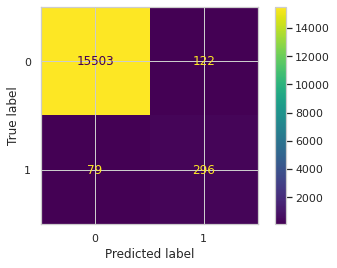

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_teste, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot()

plt.show()

## **6.2 - GridSearchCV**

Treina o modelo com diferentes hiperparâmetros.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'algorithm__min_samples_split': [3, 5, 10],
    'algorithm__criterion': ['gini', 'entropy'],
    'algorithm__max_depth': [3, 5, 15, 25],
    'algorithm__class_weight': ['balanced', None]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search = GridSearchCV(model_rf, param_grid, scoring=scorers, cv=skf, n_jobs=-1, verbose=1, refit='recall_score')

grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('numeric_imputer',
                                        MeanMedianImputer(variables=['aa_000',
                                                                     'ai_000',
                                                                     'ay_007',
                                                                     'az_001',
                                                                     'az_007',
                                                                     'ba_008',
                                                                     'cj_000',
                                                                     'cs_001',
                                                                     'cs_003',
                                                                     'cs_004',
                                                                     'de_000'])),
                                       ('algorithm',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'algorithm__class_weight': ['balanced', None],
                         'algorithm__criterion': ['gini', 'entropy'],
                         'algorithm__max_depth': [3, 5, 15, 25],
                         'algorithm__min_samples_split': [3, 5, 10]},
             refit='recall_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=1)

Identifica os melhores hiperparâmetros.

In [ ]:
# melhor combinação de hiperparâmetros
grid_search.best_params_

{'algorithm__class_weight': 'balanced',
 'algorithm__criterion': 'entropy',
 'algorithm__max_depth': 3,
 'algorithm__min_samples_split': 3}

In [ ]:
# score da melhor combinação de hiperparâmetros
grid_search.best_score_

0.9560000000000001

## **6.3 - Avalia a performance do modelo com os melhores hiperparâmetros na base de teste**

In [ ]:
tuned_rf = grid_search.best_estimator_

# Aplica o modelo na base de teste
y_pred_tuned_rf = tuned_rf.predict(X_teste)
y_proba_tuned_rf = (tuned_rf.predict_proba(X_teste)[:,1])

accuracy_tuned_rf  = accuracy_score(y_teste, y_pred_tuned_rf)
precision_tuned_rf  = precision_score(y_teste, y_pred_tuned_rf)
recall_tuned_rf  = recall_score(y_teste, y_pred_tuned_rf)
f1_tuned_rf  = f1_score(y_teste, y_pred_tuned_rf)
rocauc_tuned_rf  = roc_auc_score(y_teste, y_pred_tuned_rf)

df_metrics_rf['model'].append("Random Forest - Tunado")
df_metrics_rf['accuracy'].append(accuracy_tuned_rf)
df_metrics_rf['precision'].append(precision_tuned_rf)
df_metrics_rf['recall'].append(recall_tuned_rf)
df_metrics_rf['f1'].append(f1_tuned_rf)
df_metrics_rf['roc_auc'].append(rocauc_tuned_rf)

pd.DataFrame(df_metrics_rf).sort_values(by='recall', ascending=False)

,model,accuracy,precision,recall,roc_auc,f1
2,Random Forest - Tunado,0.93,0.26,0.97,0.95,0.40
0,Random Forest - Treino,0.98,0.82,0.80,0.98,0.81
1,Random Forest - Teste,0.99,0.71,0.79,0.99,0.75


In [ ]:
df_metrics_custo = {'model': [], 'TN': [], 'FN': [], 'FP': [], 'TP': [], 'Custo': []}

cm_teste = confusion_matrix(y_teste, y_pred_teste)
cm_tunado = confusion_matrix(y_teste, y_pred_tuned_rf)

df_metrics_custo['model'].append("Random Forest - Teste")
df_metrics_custo['TN'].append(cm_teste[0][0])
df_metrics_custo['FN'].append(cm_teste[1][0])
df_metrics_custo['FP'].append(cm_teste[0][1])
df_metrics_custo['TP'].append(cm_teste[1][1])
df_metrics_custo['Custo'].append( (cm_teste[0][1] * 10) + (cm_teste[1][1] * 25) + (cm_teste[1][0] * 500))

df_metrics_custo['model'].append("Random Forest - Tunado")
df_metrics_custo['TN'].append(cm_tunado[0][0])
df_metrics_custo['FN'].append(cm_tunado[1][0])
df_metrics_custo['FP'].append(cm_tunado[0][1])
df_metrics_custo['TP'].append(cm_tunado[1][1])
df_metrics_custo['Custo'].append( (cm_tunado[0][1] * 10) + (cm_tunado[1][1] * 25) + (cm_tunado[1][0] * 500))

pd.DataFrame(df_metrics_custo).sort_values(by='Custo')


,model,TN,FN,FP,TP,Custo
1,Random Forest - Tunado,14563,11,1062,364,25220
0,Random Forest - Teste,15503,79,122,296,48120


O modelo tunado prevê um custo de `$25.220` na base de teste, que é 32% menor que o do ano atual (`$37.000`).

# **7 - Feature Importance**

As variáveis estão ordenadas de cima para baixo em ordem de importância para o modelo.

Olhando para a variável mais importante, **aa_000**.

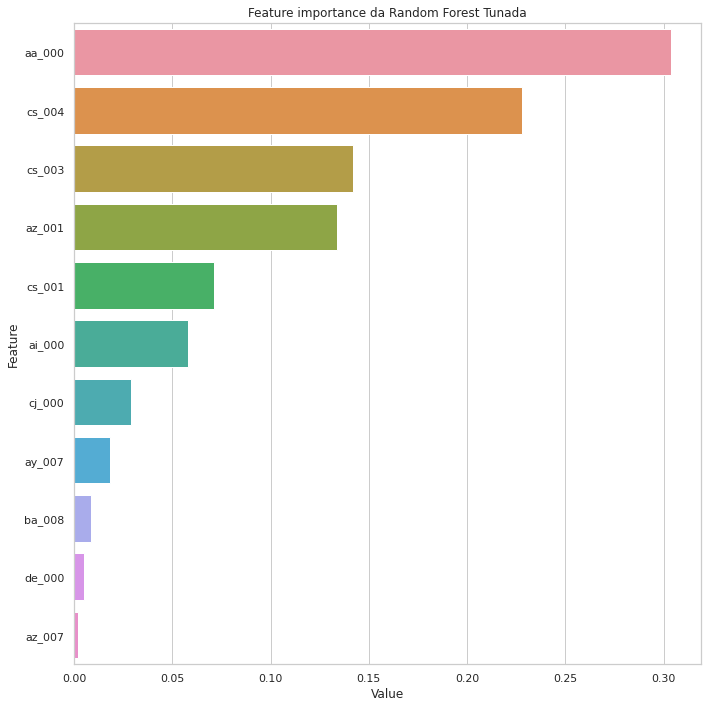

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(tuned_rf[-1].feature_importances_,X_res.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature importance da Random Forest Tunada')
plt.tight_layout()
plt.show()

# **8 - Salvando o modelo para uso posterior**

Pickle é a maneira padrão de serializar objetos em Python. Podemos usar a operação pickle para serializar nossos algoritmos de aprendizado de máquina e salvar o formato serializado em um arquivo. Posteriormente, podemos carregar esse arquivo para desserializar seu modelo e usá-lo para fazer novas previsões.

In [ ]:
import joblib
joblib.dump(tuned_rf, '/content/drive/MyDrive/rf_prop_manutencao_caminhoes.pkl')

# **9 - Próximos passos (deploy)**

O deploy do modelo pode ser testado em uma máquina virtual como ambiente de teste utilizando o **streamlit**.

# **Conclusão**
É possível reduzir os custos de manutenção utilizando técnicas de modelagem estatística e machine learning.

O modelo ajustado prevê um custo de `$25.220` na base de teste, que é 32% menor que o do ano atual (`$37.000`).